In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import researchpy as rp
from scipy.stats import shapiro, normaltest, mannwhitneyu, ttest_ind, kruskal
%matplotlib inline

In [2]:
df = pd.read_csv('hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


##### В датасете 10 признаков.
##### Типы признаков:
- satisfaction_level, last_evaluation: вещественные числа
- number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years: целые числа
- sales, salary: строки
##### Нулевых значений нет.

---

### Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

---

##### Рассчитаем статистики для вещественных и целых чисел

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


##### Из таблицы видно, что:
- количество проектов, в которых участвовали сотрудники, от 2 до 7, больше всего сотрудников участвовало в 4 проектах;
- количество часов в месяц: от 96 до 310, больше всего сотрудники работали по 200 часов;
- сотрудники работали в компании от 2 до 10 лет, мода 3 года;

##### Для признаков, состоящих из строк, можем вычислить моду

In [5]:
df.select_dtypes(include='object').mode()

,sales,salary
0,sales,low


##### Из отделов, чаще всего встречается отдел продаж, из зарплат чаще встречается - низкая.

---

### Рассчитать и визуализировать корреляционную матрицу для переменных

---

In [6]:
corr_matrix = df.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


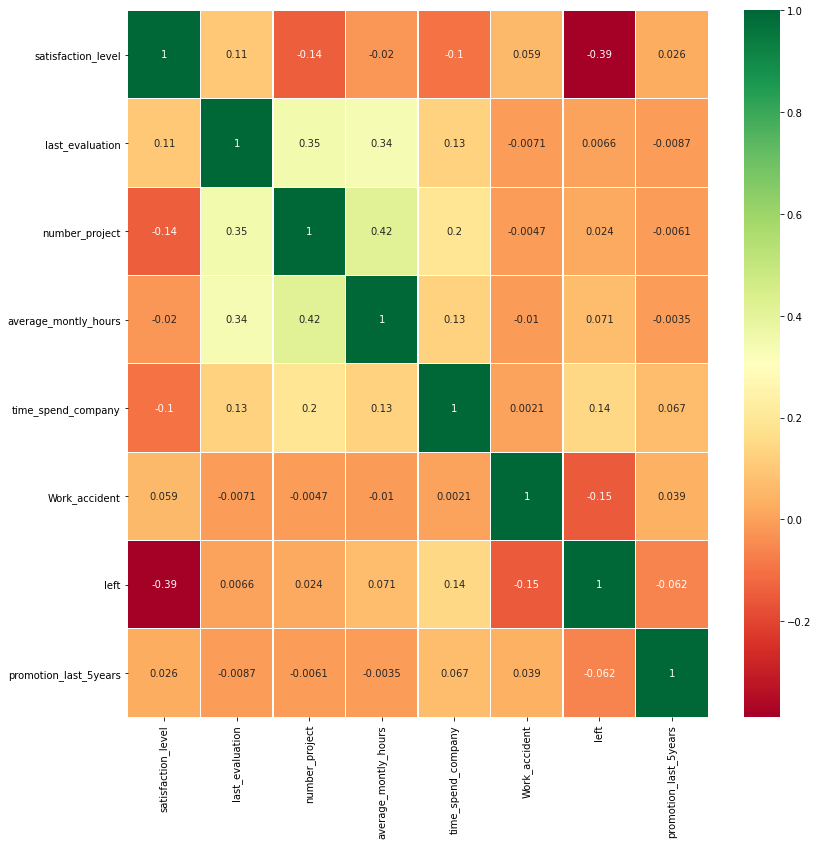

In [7]:
f, ax = plt.subplots(figsize=(13,13))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)

##### Наибольшую корреляцию имеют признаки average_montly_hours и number_project, равную 0.42. Это можно объяснить тем, что чем больше часов сотрудник компании  работал в месяц, тем в больших проектах участвовал.
##### Похожую корреляцию, но обратную, имеют признаки satisfaction_level и left. Корреляция показывает, что чем меньше уровень удовлетворённости работников, тем больше среди них, покинувших компанию.
##### Признак last_evaluation имеет корреляцию с признаками number_project и average_montly_hours, равную 0.35 и 0.34, соответственно. Т.к. признаки number_project и average_montly_hours сами коррелируют между собой, то достаточно рассмотреть корреляцию с number_project. Данная корреляция означает, что с увеличением числа проектов, увеличиваются показания last_evaluation.

---

### Визуализировать несколько взаимосвязей между переменными

---

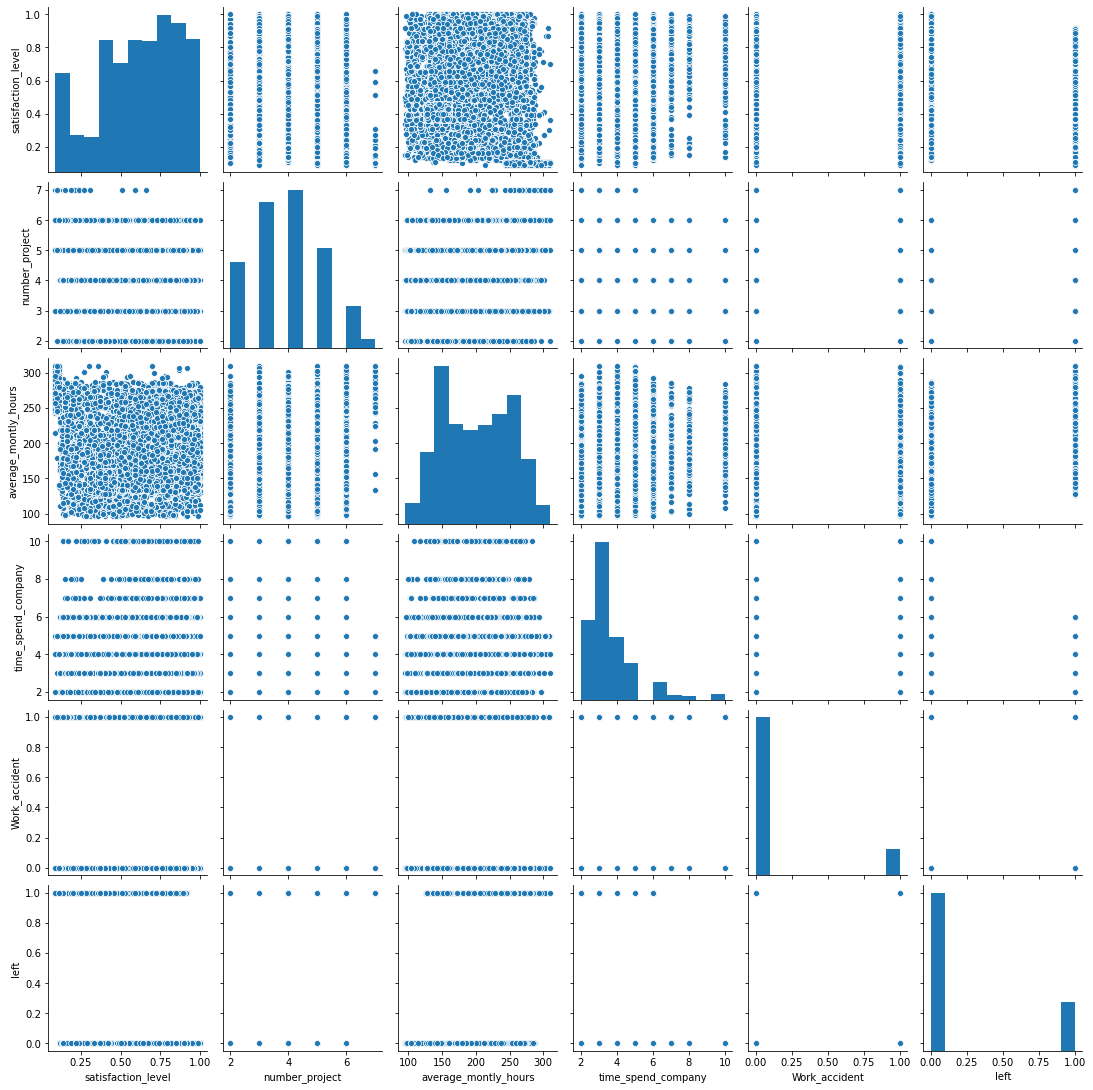

In [8]:
sns.pairplot(df, vars=['satisfaction_level', 'number_project', 'average_montly_hours',
                       'time_spend_company', 'Work_accident', 'left'], kind='scatter')

##### По графикам какая-либо взаимосвязь переменных не прослеживается.

---

### С использованием t-test статистики проверить взаимосвязи между несколькими переменными

---

##### Для примера, проверим взаимосвязь двух разных признаков. Пусть эти признаки будут number_project и average_montly_hours.

In [9]:
number_project = df['number_project']
average_montly_hours = df['average_montly_hours']

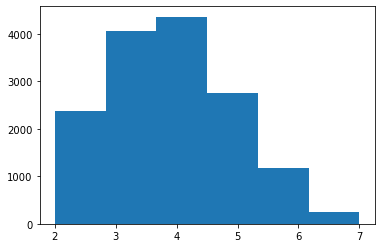

In [10]:
plt.hist(number_project, bins=6)
plt.show()

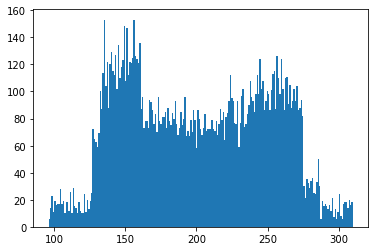

In [11]:
plt.hist(average_montly_hours, bins=215)
plt.show()

##### По графикам, только у number_project распределение похоже на нормальное. Проверим с помощью критерия Шапиро-Уилка.

In [13]:
shapiro(number_project)

(0.9216642379760742, 0.0)

In [14]:
shapiro(average_montly_hours)

(0.963361382484436, 0.0)

##### Распределения переменных не подчиняются закону нормального распределения.
##### Для оценки различий используем U-критерий Манна — Уитни.

In [15]:
mannwhitneyu(number_project, average_montly_hours)

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

##### pvalue=0.0 < 0.05, из этого следует, что между атрибутами имеется статистическое различие. Это подтверждает, что
##### признаки различны.

---

##### Проверим взаимосвязь между выборками: уровень удовлетворённости работников, у которых был несчастный случай и у
##### которых его не было.

In [16]:
satisfaction_accident = df[df['Work_accident']==1]['satisfaction_level']
satisfaction_no_accident = df[df['Work_accident']==0]['satisfaction_level']
len(satisfaction_accident), len(satisfaction_no_accident)

(2169, 12830)

In [17]:
satisfaction_accident = satisfaction_accident.sample(2169)
satisfaction_no_accident = satisfaction_no_accident.sample(2169)

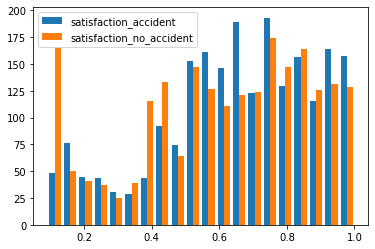

In [18]:
plt.hist([satisfaction_accident, satisfaction_no_accident], bins=20,
         label=['satisfaction_accident', 'satisfaction_no_accident'])
plt.legend(loc='upper left')
plt.show()

##### Графически различия заметны, но вывод сделать сложно. Применим один из критериев, аналогично предыдущему примеру.

In [19]:
shapiro(satisfaction_accident)

(0.9525761008262634, 5.991169928750587e-26)

In [20]:
shapiro(satisfaction_no_accident)

(0.9452692866325378, 1.1792416086409574e-27)

In [21]:
mannwhitneyu(satisfaction_accident, satisfaction_no_accident)

MannwhitneyuResult(statistic=2166341.5, pvalue=3.26197888591539e-06)

##### С помощью U-критерия Манна — Уитни делаем вывод, что выборки статистически различны. Значит уровень
##### удовлетворённости зависит от того, был ли несчастный случай.

In [22]:
# Средние значения уровня удовлетворённости работников с которыми произошёл несчастный случай и у которых его не было
satisfaction_accident.mean(), satisfaction_no_accident.mean()

(0.6483264177040131, 0.6101475334255423)

##### Среднее значение уровня удовлетворённости работников, с которыми произошёл несчастный случай, немного больше чем у 
##### тех, у которых его не было. Возможно, несчастные случаи происходили после измерения уровня удовлетворённости.

---

##### Проверим ещё одну взаимосвязь: уровень удовлетворённости работников при последнем измерении, с которыми происходил
##### несчастный случай и у которых его не было.

In [23]:
last_evaluation_accident = df[df['Work_accident']==1]['last_evaluation']
last_evaluation_no_accident = df[df['Work_accident']==0]['last_evaluation']

In [24]:
last_evaluation_accident = last_evaluation_accident.sample(2169)
last_evaluation_no_accident = last_evaluation_no_accident.sample(2169)

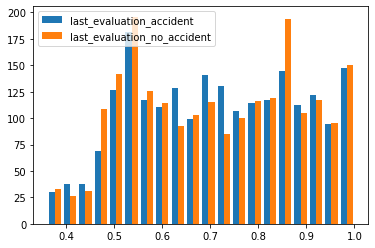

In [25]:
plt.hist([last_evaluation_accident, last_evaluation_no_accident], bins=20,
         label=['last_evaluation_accident', 'last_evaluation_no_accident'])
plt.legend(loc='upper left')
plt.show()

##### Гистограммы выборок похожи.

In [26]:
shapiro(last_evaluation_accident)

(0.9656562805175781, 2.5618582276656585e-22)

In [27]:
shapiro(last_evaluation_no_accident)

(0.9540467858314514, 1.3958323026324683e-25)

In [28]:
mannwhitneyu(last_evaluation_accident, last_evaluation_no_accident)

MannwhitneyuResult(statistic=2335876.0, pvalue=0.34539257493439457)

##### Применив U-критерий Манна-Уитни видим, что pvalue=0.345 > 0.05. Делаем вывод, что между выборками нет статистического
##### различия.
##### Посмотрим, что покажет t-критерий.

In [29]:
statistics.variance(last_evaluation_accident), statistics.variance(last_evaluation_no_accident)

(0.027810496232555687, 0.029367770275213124)

In [30]:
# Дисперсии мало отличаются, применим t-критерий Стюдента
ttest_ind(last_evaluation_accident, last_evaluation_no_accident)

Ttest_indResult(statistic=0.3115904988403872, pvalue=0.7553667361447793)

##### t-критерий Стюдента также показывает, что выборки не имеют статистического различия.

##### С проверкой статистического различия мы также проверили гипотезу о том, что уровень удовлетворённости не зависит от
##### того, произошёл ли несчастный случай на работе.

---

### Рассчитать сколько работников работает в каждом департаменте

---

In [31]:
dept_count = df.groupby(['sales']).count().iloc[:, :1].rename(columns = {'satisfaction_level': 'Count'})
dept_count.reset_index().sort_values(by='Count', ascending=False).style.bar()

,sales,Count
7,sales,4140
9,technical,2720
8,support,2229
0,IT,1227
6,product_mng,902
5,marketing,858
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


##### Больше всего работников работает в отделе продаж, меньше всего среди руководителей.

---

### Показать распределение сотрудников по зарплатам

---

In [32]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

##### Большую часть зарплат составляют низкие и средние, низких чуть больше. Высоких зарплат около 10 %.

---

### Показать распределение сотрудников по зарплатам совместно с департаментами

---

In [33]:
df.groupby(['sales'])['salary'].value_counts()

sales        salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

##### В большинстве департаментов больше низких зарплат, меньше средних и 6 - 9 % высоких. Кроме трёх:  в отделах hr и RandD
##### средних чуть болше, чем низких, и высоких около 6 %, в отделе management высоких и средних равное количество,
##### низких - около 30 %.

---

### Сколько сотрудников покинули компанию

---

In [34]:
df['left'].sum()

3571

##### 3571 сотрудник покинуло компанию. Это около 24 %.

---

### Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

---

##### Из корреляционной матрицы видно, что признак left коррелирует с признаками: satisfaction_level, Work_accident и
##### time_spend_company

##### Проверим гипотезу, что уровень удовлетворённости отличается у тех, кто покинул компанию от тех, кто остался

In [35]:
left_satisfaction = df[df['left']==1]['satisfaction_level']
stayed_satisfaction = df[df['left']==0]['satisfaction_level']
len(left_satisfaction), len(stayed_satisfaction)

(3571, 11428)

In [36]:
# Посчитаем средние значения
print(left_satisfaction.mean())
print(stayed_satisfaction.mean())

0.44009801176140917
0.666809590479516


In [37]:
left_satisfaction = left_satisfaction.sample(3571)
stayed_satisfaction = stayed_satisfaction.sample(3571)

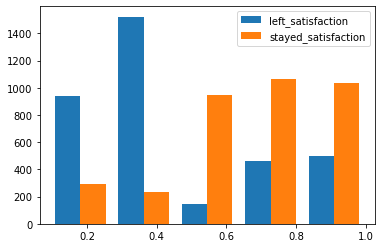

In [38]:
plt.hist([left_satisfaction, stayed_satisfaction], bins=5, label=['left_satisfaction', 'stayed_satisfaction'])
plt.legend(loc='upper right')
plt.show()

##### Проверим, подчиняются ли выборки нормальному распределению.

In [39]:
shapiro(left_satisfaction)

(0.8881876468658447, 4.203895392974451e-45)

In [40]:
shapiro(stayed_satisfaction)

(0.9523134827613831, 1.264964017662455e-32)

##### Тест Шапиро-Уилка показывает, что распределение выборок отличается от нормального. Поэтому для оценки
##### статистического различия применим U-критерий Манна-Уитни.

In [41]:
mannwhitneyu(left_satisfaction, stayed_satisfaction)

MannwhitneyuResult(statistic=3229802.0, pvalue=5.469063004572282e-286)

##### Наша гипотеза верна, учитывая средние значения (0.44 и 0.67), делаем вывод, что у работников, покинувших компанию, уровень
##### удовлетворённости меньше.

---

##### Выдвинем гипотезу, что средние значения выборки покинувших компанию сотрудников, у которых были несчастные случаи на 
##### работе, и у которых их не было, равны.

In [42]:
no_accident = df[df['Work_accident']==0]['left']
accident = df[df['Work_accident']==1]['left']

In [43]:
rp.ttest(no_accident, accident, equal_variances=False)

(   Variable        N      Mean        SD        SE  95% Conf.  Interval
 0      left  12830.0  0.265160  0.441435  0.003897   0.257521  0.272799
 1      left   2169.0  0.077916  0.268101  0.005757   0.066627  0.089205
 2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899,
                 Welch's t-test    results
 0  Difference (left - left) =      0.1872
 1        Degrees of freedom =   4452.6240
 2                         t =     26.9347
 3     Two side test p value =      0.0000
 4    Difference < 0 p value =      1.0000
 5    Difference > 0 p value =      0.0000
 6                 Cohen's d =      0.6253
 7                 Hedge's g =      0.6253
 8             Glass's delta =      0.4242
 9                         r =      0.3743)

##### Т.к. p value (Two side) = 0.0000, т. е. вероятность ошибки первого рода равна 0, то мы отвергаем нулевую гипотезу о том, что
##### средние значения выборок равны, и принимаем альтернативную - средние значения не равны. 
##### Среднее значение выборки работников, покинувших компанию, у которых были несчастные случаи, значительно меньше.

In [44]:
# Посмотрим на количество ушедших работников, с которыми произошёл несчастный случай
len(df[(df['Work_accident']==1) & (df['left']==1)])

169

##### Из всех сотрудников, имевших несчастный случай, их 2169, ушедших из компании 169. Это около 8 %, что является
##### незначительным. 
##### Если рассматривать относительно ушедших сотрудников, то около 5 % имели несчастный случай.
##### Вывод: несчастные случаи не влияют на значительный уход сотрудников из компании.

---

##### Проверим гипотезу, что средние значения отработанных в компании дней ушедших и оставшихся работников отличаются.

In [45]:
time_spend_company_left = df[df['left']==1]['time_spend_company']
time_spend_company_stayed = df[df['left']==0]['time_spend_company']

In [46]:
rp.ttest(time_spend_company_left, time_spend_company_stayed, equal_variances=False)

(             Variable        N      Mean        SD        SE  95% Conf.  \
 0  time_spend_company   3571.0  3.876505  0.977698  0.016361   3.844427   
 1  time_spend_company  11428.0  3.380032  1.562348  0.014615   3.351384   
 2            combined  14999.0  3.498233  1.460136  0.011922   3.474864   
 
    Interval  
 0  3.908583  
 1  3.408679  
 2  3.521602  ,
                                       Welch's t-test    results
 0  Difference (time_spend_company - time_spend_co...     0.4965
 1                              Degrees of freedom =   9625.5659
 2                                               t =     22.6308
 3                           Two side test p value =      0.0000
 4                          Difference < 0 p value =      1.0000
 5                          Difference > 0 p value =      0.0000
 6                                       Cohen's d =      0.4339
 7                                       Hedge's g =      0.4338
 8                                   Glass's del

##### Two side p-value<0.05, поэтому мы принимаем альтернативную гипотезу, что выборочные средние значения не равны. Сравнивая
##### средние значения, видим, что ушедшие из компании сотрудники в среднем работали немного дольше.

In [47]:
# Посмотрим на количество ушедших сотрудников по количеству отработанных лет
df[df['left']==1]['time_spend_company'].value_counts()

3    1586
4     890
5     833
6     209
2      53
Name: time_spend_company, dtype: int64

##### Мы видим, что сотрудники покидали компанию чаще всего после 3-х лет работы. До 3-х лет сотрудники покидали компанию 
##### редко и с увеличением стажа, количество покинувших уменьшается. 

---

##### Посмотрим на распределение оставшихся и ушедших сотрудников в зависимости от зарплаты

In [48]:
salary_low = df[df['salary']=='low']['left']
salary_medium = df[df['salary']=='medium']['left']
salary_high = df[df['salary']=='high']['left']

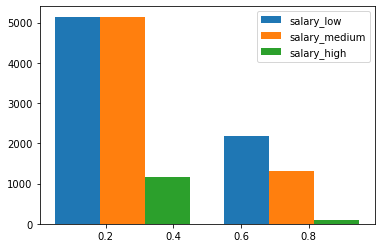

In [49]:
plt.hist([salary_low, salary_medium, salary_high], bins=2, label=['salary_low', 'salary_medium', 'salary_high'])
plt.legend(loc='upper right')
plt.show()

##### Из графика видно, что с увеличением зарплаты количество ушедших сотрудников уменьшается.

##### Дисперсии выборок различны, поэтому мы не можем применить множественный тест ANOVA. Применим h-тест Крускал-Уолиса,
##### в которой гипотеза $H_0$: медианы всех трёх выборок одинаковы.

In [50]:
kruskal(salary_low, salary_medium, salary_high)

KruskalResult(statistic=381.19963036863436, pvalue=1.6732160186287216e-83)

##### Т.к. pvalue<0.05 мы отвергаем нулевую гипотезу - медианы выборок различны. Выборки статистически различны.

##### Проверим с помощью t-критерия.

In [51]:
rp.ttest(salary_low, salary_medium, equal_variances=False)

(   Variable        N      Mean        SD        SE  95% Conf.  Interval
 0      left   7316.0  0.296884  0.456916  0.005342   0.286412  0.307355
 1      left   6446.0  0.204313  0.403230  0.005022   0.194467  0.214158
 2  combined  13762.0  0.253524  0.435044  0.003708   0.246255  0.260793,
                 Welch's t-test     results
 0  Difference (left - left) =       0.0926
 1        Degrees of freedom =   13759.9640
 2                         t =      12.6253
 3     Two side test p value =       0.0000
 4    Difference < 0 p value =       1.0000
 5    Difference > 0 p value =       0.0000
 6                 Cohen's d =       0.2157
 7                 Hedge's g =       0.2157
 8             Glass's delta =       0.2026
 9                         r =       0.1070)

In [52]:
rp.ttest(salary_medium, salary_high, equal_variances=False)

(   Variable       N      Mean        SD        SE  95% Conf.  Interval
 0      left  6446.0  0.204313  0.403230  0.005022   0.194467  0.214158
 1      left  1237.0  0.066289  0.248888  0.007077   0.052406  0.080173
 2  combined  7683.0  0.182090  0.385944  0.004403   0.173459  0.190722,
                 Welch's t-test    results
 0  Difference (left - left) =      0.1380
 1        Degrees of freedom =   2665.0821
 2                         t =     15.9057
 3     Two side test p value =      0.0000
 4    Difference < 0 p value =      1.0000
 5    Difference > 0 p value =      0.0000
 6                 Cohen's d =      0.4937
 7                 Hedge's g =      0.4937
 8             Glass's delta =      0.3423
 9                         r =      0.2944)

##### Проверка гипотез t-критерия о равных выборочных средних значениях, показывает, что средние значения у работников с низкой
##### и средней зарплатой отличаются, так же отличаются и у работников с средней и высокой зарплатой. Сравнивая средние
##### значения, делаем вывод, что с уменьшением зарплаты количество покинувших компанию сотрудников увеличивается.

---

##### Выдвинем гипотезу, что средние значения выборки покинувших компанию сотрудников, получивших повышение и не 
##### получивших, равны.

In [53]:
promotion_left = df[df['promotion_last_5years']==1]['left']
no_promotion_left = df[df['promotion_last_5years']==0]['left']

In [54]:
rp.ttest(promotion_left, no_promotion_left, equal_variances=False)

(   Variable        N      Mean        SD        SE  95% Conf.  Interval
 0      left    319.0  0.059561  0.237044  0.013272   0.033449  0.085673
 1      left  14680.0  0.241962  0.428286  0.003535   0.235033  0.248891
 2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899,
                 Welch's t-test   results
 0  Difference (left - left) =    -0.1824
 1        Degrees of freedom =   364.6766
 2                         t =   -13.2804
 3     Two side test p value =     0.0000
 4    Difference < 0 p value =     0.0000
 5    Difference > 0 p value =     1.0000
 6                 Cohen's d =    -0.7516
 7                 Hedge's g =    -0.7516
 8             Glass's delta =    -0.7695
 9                         r =     0.5709)

##### Т.к. p value (Two side) = 0.0000 мы принимаем альтернативную гипотезу - средние значения не равны. 
##### Среднее значение выборки ушедших сотрудников, получивших повышение, значительно меньше.

In [55]:
# Посмотрим на количество ушедших работников, получивших повышение
len(df[(df['promotion_last_5years']==1) & (df['left']==1)])

19

##### Около 6 % сотрудников, получивших повышение, покинуло компанию.
##### Среди сотрудников, получивших повышение, мало ушедших из компании, но доля таких сотрудников относительно общего 
##### количества незначительная, поэтому делать вывод о том, что повышение влияет на значительный уход мы не можем.

---

##### Таким образом, для того чтобы понять почему 24 % сотрудников покинуло компанию, мы имеем выводы из гипотез:
- У сотрудников, покинувших компанию, уровень удовлетворённости ниже
- Сотрудники покидают компанию чаще всего после 3-х лет работы, с увеличением стажа количество покинувших сотрудников уменьшается
- С увеличением зарплаты количество ушедших сотрудников уменьшается
